In [1]:
# importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data collection and preprocessing
df = pd.read_csv('academic_stress.csv')
df.head()

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Timestamp                                                            140 non-null    object
 1   Your Academic Stage                                                  140 non-null    object
 2   Peer pressure                                                        140 non-null    int64 
 3   Academic pressure from your home                                     140 non-null    int64 
 4   Study Environment                                                    139 non-null    object
 5   What coping strategy you use as a student?                           140 non-null    object
 6   Do you have any bad habits like smoking, drinking on a daily basis?  140 non-null    object
 7   What would you rat

In [4]:
# checking the statistical measures
df.describe()

,Peer pressure,Academic pressure from your home,What would you rate the academic competition in your student life,Rate your academic stress index
count,140.000000,140.000000,140.000000,140.000000
mean,3.071429,3.178571,3.492857,3.721429
std,1.083844,1.276618,1.028349,1.032339
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,3.000000
50%,3.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [5]:
#checking for missing values
df.isnull().sum()

Timestamp                                                              0
Your Academic Stage                                                    0
Peer pressure                                                          0
Academic pressure from your home                                       0
Study Environment                                                      1
What coping strategy you use as a student?                             0
Do you have any bad habits like smoking, drinking on a daily basis?    0
What would you rate the academic  competition in your student life     0
Rate your academic stress index                                        0
dtype: int64

In [6]:
#filling the missing value with mode
df['Study Environment'].fillna(df['Study Environment'].mode()[0],inplace = True )

C:\Users\abdulrahman\AppData\Local\Temp\ipykernel_12212\2223862872.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Study Environment'].fillna(df['Study Environment'].mode()[0],inplace = True )


In [7]:
df.isnull().sum()

Timestamp                                                              0
Your Academic Stage                                                    0
Peer pressure                                                          0
Academic pressure from your home                                       0
Study Environment                                                      0
What coping strategy you use as a student?                             0
Do you have any bad habits like smoking, drinking on a daily basis?    0
What would you rate the academic  competition in your student life     0
Rate your academic stress index                                        0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
scaler = StandardScaler()

In [9]:
df['Timestamp']=le.fit_transform(df['Timestamp'])
df['Your Academic Stage']=le.fit_transform(df['Your Academic Stage'])
df['Study Environment'] = le.fit_transform(df['Study Environment'])
df['What coping strategy you use as a student?'] = le.fit_transform(df['What coping strategy you use as a student?'])
df['Do you have any bad habits like smoking, drinking on a daily basis?']= le.fit_transform(df['Do you have any bad habits like smoking, drinking on a daily basis?'])

In [10]:
print(df.columns.tolist())


['Timestamp', 'Your Academic Stage', 'Peer pressure', 'Academic pressure from your home', 'Study Environment', 'What coping strategy you use as a student?', 'Do you have any bad habits like smoking, drinking on a daily basis?', 'What would you rate the academic  competition in your student life', 'Rate your academic stress index ']


In [11]:

df['Peer pressure']= scaler.fit_transform(df[['Peer pressure']])
df['Timestamp'] =scaler.fit_transform(df[['Timestamp']])
df['Academic pressure from your home'] =scaler.fit_transform(df[['Academic pressure from your home']])
df['What would you rate the academic  competition in your student life']=scaler.fit_transform(df[['What would you rate the academic  competition in your student life']])
df['Rate your academic stress index '] =scaler.fit_transform(df[['Rate your academic stress index ']])



<Figure size 500x500 with 0 Axes>

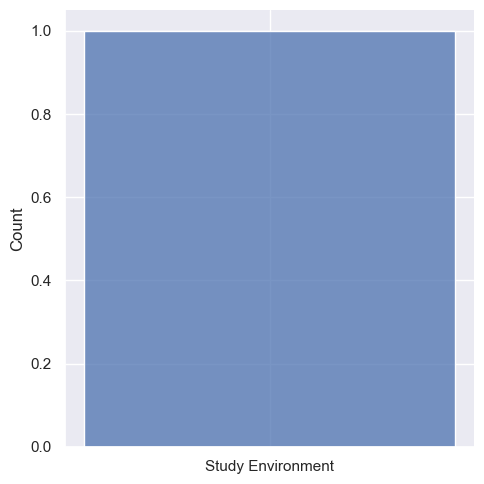

In [12]:
#Data Visaulization
sns.set()
plt.figure(figsize=(5,5))
sns.displot(['Study Environment'])
plt.show()

In [13]:
!pip install pandas-profiling

  Using cached pandas_profiling-3.2.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached MarkupSafe-2.1.5.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [19 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
      exec(compile('''
      ~~~~^^^^^^^^^^^^
      # This is <pip-setuptools-caller> -- a caller that pip uses to run setup.py
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
      ...<32 lines>...
      exec(compile(setup_py_code, filename, "exec"))
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
      ''' % ('C:\\Users\\abdulrahman\\AppData\\Local\\Temp\\pip-install-9w6qei45\\htmlmin_14e61c95268d43de829eb2ba418b59ed\\setup.py',), "<pip-setuptools-caller>", "exec"))
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "<pip-setuptools-caller>", line 35, in <module>
    File "C:\Users\abdulrahman\AppData\Local\

In [19]:
#!pip install cgi
#!python3.10 -m pip install ipykernel
#!python3.10 -m ipykernel install --user --name=python310 --display-name "Python 3.10"
py -3.10 -

SyntaxError: invalid syntax (2195882725.py, line 4)